In [121]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random
from scipy.optimize import curve_fit
from auxPlots import selectColor, xSecTest
from aux import getInfo, getLHEevents, getDistributions


pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams['figure.max_open_warning'] = 50
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [3]:
#Reading files with bias
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/*/*/*.npz'))
sm_files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/sm/*/*.npz'))
data = []
bias_2k_2 = []
bias_2k_4 = []
data_sm = []
#Loading the distributions
for f in files + sm_files:
    aux = np.load(f, allow_pickle = True)
    if aux['model'] == 'SM':
        if '2k_2' in f:
            bias_2k_2.append(aux)
        elif '2k_4' in f:
            bias_2k_4.append(aux)
        else:
            data_sm.append(aux)
        
    else:
        data.append(aux)
        
data_sm.append(bias_2k_2)
data_sm.append(bias_2k_4)

data = sorted(data, key=lambda d: d['mass_params'][0])

In [122]:
#Reading files without bias
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/*/*/*.npz'))
#files = list(glob.glob('/home/vinicius/EFT_ToyModel/test/Distributions/*/*/*.npz'))
data = []
data_sm = []
#Loading the distributions
for f in files:
    aux = np.load(f, allow_pickle = True)
    if aux['model'] == 'SM':
        data_sm.append(aux)
    else:
        data.append(aux)

data = sorted(data, key=lambda d: d['mass_params'][0])


In [191]:
select = []
for d in data:
    if d['mass_params'][0] == 500.0:
        select.append(d)

print(select)

[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/TopEFT/gg2ttbar_gs4_ydm2/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/TopEFT/qq2ttbar_gs4_ydm2/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/UV_BSM/gg2ttbar_gs4_ydm2/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/UV_BSM/qq2ttbar_gs4_ydm2/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights...]


62986 75000
87918 103356


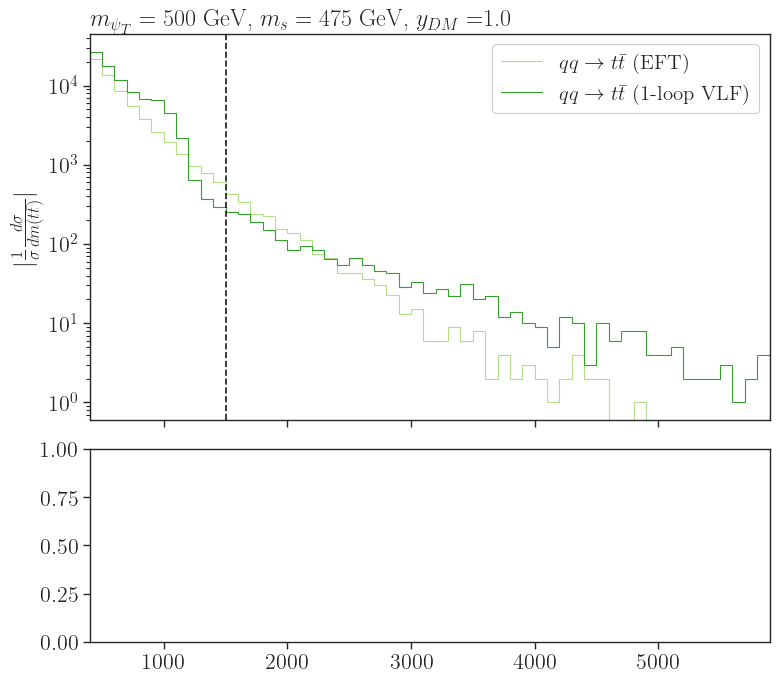

In [193]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']
    

bins = np.arange(400.,6000.,100.)   
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select):
    if r'$g g \to t \bar{t}$' in d['process']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        axarr[0].stairs(h, edges, color = c[j], label = labels[j] )
        print(sum(h), d['nevents'])
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
axarr[0].axvline(x=1500, color='k', linestyle='--')
#axarr[0].set_ylim(1e-8,1e-1)



    
plt.show()

[-8.11405481e-11  1.38281743e-06 -8.09606434e-03  1.35331383e+01]
[-9.69924817e-11  1.26509096e-06 -6.13605525e-03  1.19036260e+01]


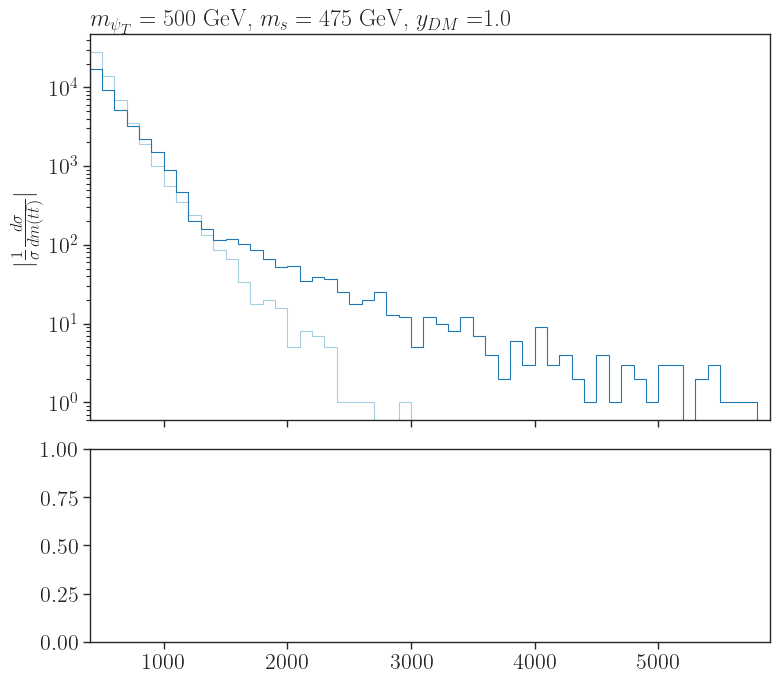

In [307]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']
    

bins = np.arange(400.,6000.,100.)   
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select):
    if r'$q q \to t \bar{t}$' in d['process']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        axarr[0].stairs(h, edges, color = c[j], label = labels[j] )
        
         # =================================================================
        # START: New, improved quadratic exponential fit
        # =================================================================
        
        # 1. Prepare the data for fitting
        bin_centers = (edges[:-1] + edges[1:]) / 2.0
        counts_for_fit = np.abs(h)
        
        # 2. Create a mask to fit only non-zero bins for stability
        mask = counts_for_fit > 0
        if np.sum(mask) > 3: # Need at least 3 points for a quadratic fit
        
            # 3. Take the logarithm of the y-data
            log_counts = np.log(counts_for_fit[mask])
        
            # 4. Fit a 2nd-degree polynomial to the LOG of the data
            # This is the key step: the '2' fits a parabola (ax^2 + bx + c)
            coeffs = np.polyfit(bin_centers[mask], log_counts, 3)
            print(coeffs)
        
            # 5. Create a polynomial function from the coefficients
            p = np.poly1d(coeffs)
        
            # 6. Calculate the y-values by exponentiating the polynomial
            # This transforms the fitted parabola back into the curved exponential shape
            y_fit = np.exp(p(bin_centers))
        
            # 7. Plot the improved fit
            #axarr[0].plot(bin_centers, y_fit, color='black', linestyle='--', 
                         # label=f'Quad. Fit for {model}')
        
        # =================================================================
        # END: New fit section
        # =================================================================
                      
       
           
#Main plot configs
#axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
#axarr[0].set_ylim(1e-8,1e-1)



    
plt.show()

In [8]:
print(np.exp(10.5))

36315.502674246636


EFT [ 5.46241138e-07 -4.57051451e-03 -1.95583108e+00]


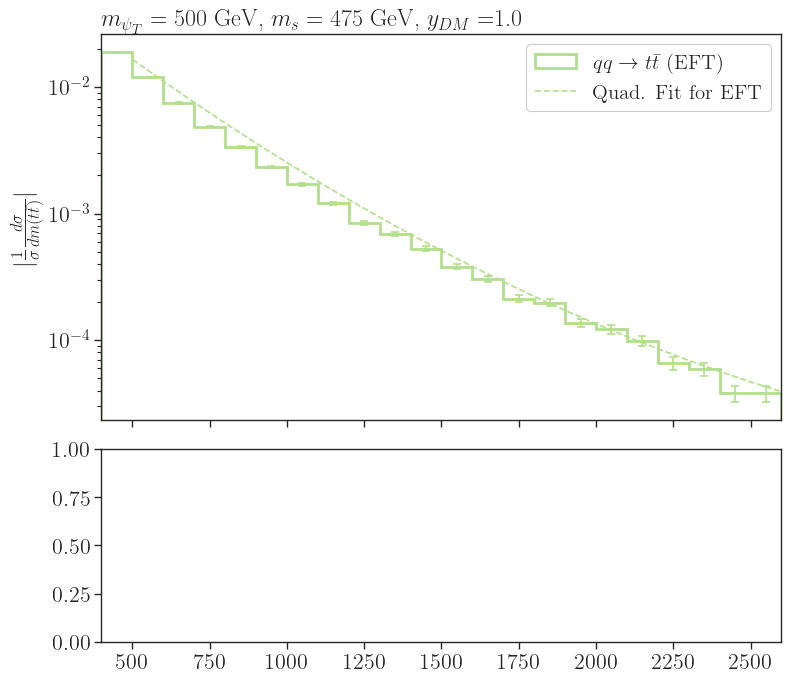

In [311]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']
    

bins = np.arange(400.,2700.,100.)   
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select):
    if r'$g g \to t \bar{t}$' in d['process'] or 'EFT' not in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                          color=c[j],alpha=1.0,histtype='step',
                         linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        #Propagating the error since we are dealing with normalized histograms
        #yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
        yErr = hErr
        axarr[0].errorbar(x,aux[0], yerr = yErr,
                      color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
        
        # =================================================================
        # START: New, improved quadratic exponential fit
        # =================================================================
        
        # 1. Prepare the data for fitting
        bin_centers = (edges[:-1] + edges[1:]) / 2.0
        bin_centers = bins[1:]
        counts_for_fit = np.abs(h)
        
        # 2. Create a mask to fit only non-zero bins for stability
        mask = counts_for_fit > 0
        if np.sum(mask) > 3: # Need at least 3 points for a quadratic fit
        
            # 3. Take the logarithm of the y-data
            log_counts = np.log(counts_for_fit[mask])
        
            # 4. Fit a 2nd-degree polynomial to the LOG of the data
            # This is the key step: the '2' fits a parabola (ax^2 + bx + c)
            coeffs = np.polyfit(bin_centers[mask], log_counts, 2)
            print(model, coeffs)
        
            # 5. Create a polynomial function from the coefficients
            p = np.poly1d(coeffs)
        
            # 6. Calculate the y-values by exponentiating the polynomial
            # This transforms the fitted parabola back into the curved exponential shape
            y_fit = np.exp(p(bin_centers))
        
            # 7. Plot the improved fit
            axarr[0].plot(bin_centers, y_fit, color=c[j], linestyle='--', 
                          label=f'Quad. Fit for {model}')
        
        # =================================================================
        # END: New fit section
        # =================================================================
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
#axarr[0].set_ylim(1e-8,1e-1)



    
plt.show()

1-loop VLF [-4.41315204e-06  3.77628871e-03 -5.67151655e+00]
1-loop VLF [ 1.67472697e-04 -5.28632455e-01  4.03693024e+02]
1-loop VLF [-2.18743967e-08 -2.18401389e-03 -6.47225323e+00]


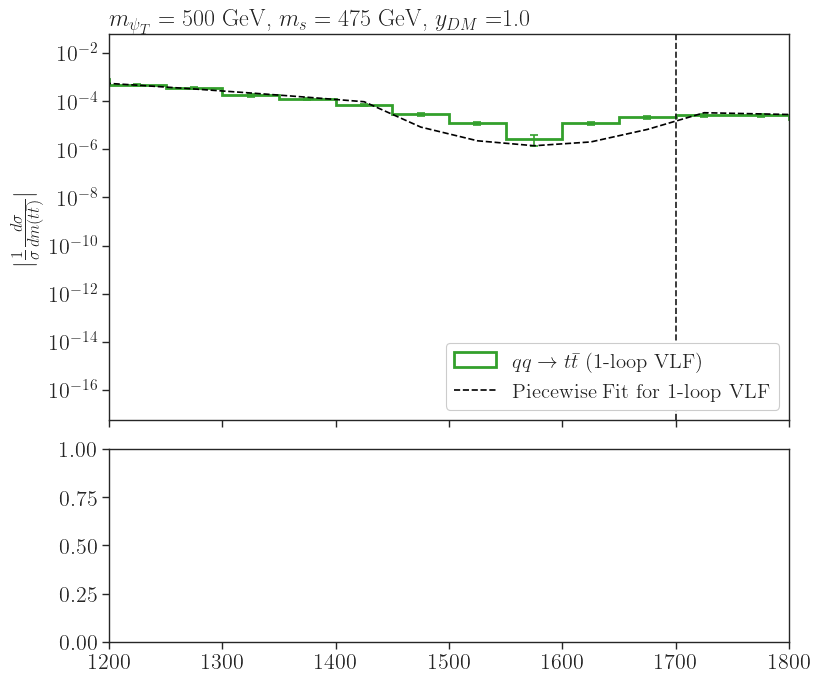

In [399]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']
    

 
bins = np.arange(400., 6000., 50.0)
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select):
    if r'$g g \to t \bar{t}$' in d['process']  or 'EFT' in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                          color=c[j],alpha=1.0,histtype='step',
                         linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        #Propagating the error since we are dealing with normalized histograms
        #yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
        yErr = hErr
        axarr[0].errorbar(x,aux[0], yerr = yErr,
                      color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
        
                # =================================================================
        # START: Complete Piecewise Fit and Plotting Section
        # =================================================================
        
        # 1. Prepare the data for fitting
        bin_centers = (edges[:-1] + edges[1:]) / 2.0
        #bin_centers = edges[:-1]
        counts_for_fit = np.abs(h)
        
        # 2. Define the fit boundaries
        low_mass_max = 1450.0
        mid_mass_max = 1700.0
        
        # 3. Create masks for each region
        mask_low = (counts_for_fit > 0) & (bin_centers < low_mass_max)
        mask_mid = (counts_for_fit > 0) & (bin_centers >= low_mass_max) & (bin_centers < mid_mass_max)
        mask_high = (counts_for_fit > 0) & (bin_centers >= mid_mass_max)

      
        # --- Fit the three regions separately ---
        coeffs_low, coeffs_mid, coeffs_high = None, None, None
        if np.sum(mask_low) > 2:
            coeffs_low = np.polyfit(bin_centers[mask_low], np.log(counts_for_fit[mask_low]), 2)
            print(model, coeffs_low)
        if np.sum(mask_mid) > 4:
            log_counts_mid = np.log(counts_for_fit[mask_mid]) - 1.3
            coeffs_mid = np.polyfit(bin_centers[mask_mid], log_counts_mid, 2)
            print(model, coeffs_mid)
        if np.sum(mask_high) > 3:
            coeffs_high = np.polyfit(bin_centers[mask_high], np.log(counts_for_fit[mask_high]), 2)
            print(model, coeffs_high)
        
        # --- PLOTTING PART: Construct the full piecewise curve ---
        
        # Create an array to hold the full fitted curve
        y_fit = np.zeros_like(bin_centers)
        
        # Create boolean masks just for plotting (no need to check for counts > 0 here)
        plot_mask_low = bin_centers < low_mass_max
        plot_mask_mid = (bin_centers >= low_mass_max) & (bin_centers < mid_mass_max)
        plot_mask_high = bin_centers >= mid_mass_max
        
        # Apply each fit to its corresponding region
        if coeffs_low is not None:
            p_low = np.poly1d(coeffs_low)
            y_fit[plot_mask_low] = np.exp(p_low(bin_centers[plot_mask_low]))
        
        if coeffs_mid is not None:
            p_mid = np.poly1d(coeffs_mid)
            y_fit[plot_mask_mid] = np.exp(p_mid(bin_centers[plot_mask_mid]))
        
        if coeffs_high is not None:
            p_high = np.poly1d(coeffs_high)
            y_fit[plot_mask_high] = np.exp(p_high(bin_centers[plot_mask_high]))
        
        # Plot the final combined curve
        # We plot only where y_fit is positive to avoid issues with the log scale
        axarr[0].plot(bin_centers[y_fit > 0], y_fit[y_fit > 0], color='black', linestyle='--', 
                      label=f'Piecewise Fit for {model}')
        
        # =================================================================
        # END: Complete Piecewise Fit and Plotting Section
        # =================================================================
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='lower right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
axarr[0].set_xlim(1200,1800)
axarr[0].axvline(x=2650, color='k', linestyle='--')
axarr[0].axvline(x=1700, color='k', linestyle='--')
#axarr[0].set_ylim(1e-8,1e-1)



    
plt.show()

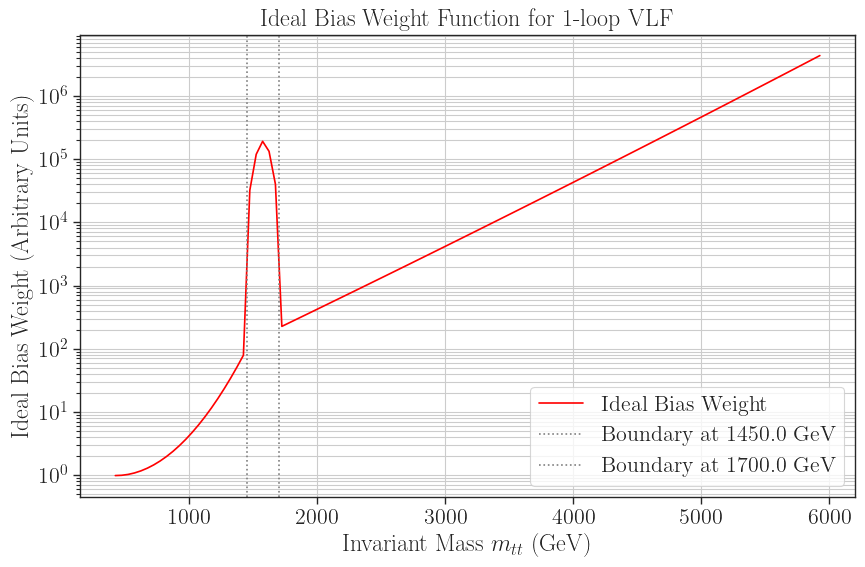

In [363]:
# This cell must be run AFTER the previous cell that performs the fits.
# It uses the coefficients and bin information calculated there.

# 1. Create a new, separate plot for the bias weight
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Reconstruct the polynomial functions from the stored coefficients
if coeffs_low is not None:
    p_low = np.poly1d(coeffs_low)
if coeffs_mid is not None:
    p_mid = np.poly1d(coeffs_mid)
if coeffs_high is not None:
    p_high = np.poly1d(coeffs_high)

# 3. Calculate the INVERSE of the piecewise fit (this is the ideal bias weight)
#    Initialize an empty array to store the result
y_inverse_fit = np.zeros_like(bin_centers)

# Apply the inverse of each fit to its corresponding region
if coeffs_low is not None:
    y_inverse_fit[plot_mask_low] = np.exp(-p_low(bin_centers[plot_mask_low])+ p_low(500.0)) 

if coeffs_mid is not None:
    y_inverse_fit[plot_mask_mid] = np.exp(-p_mid(bin_centers[plot_mask_mid]))
    
if coeffs_high is not None:
    y_inverse_fit[plot_mask_high] = np.exp(-p_high(bin_centers[plot_mask_high])+ p_low(500.0))

# 4. Plot the final combined curve for the bias weight
#    We plot only the positive parts for the log scale
ax.plot(bin_centers[y_inverse_fit > 0], y_inverse_fit[y_inverse_fit > 0], 
        color='red', linestyle='-', label='Ideal Bias Weight')

# 5. Add vertical lines to show the boundaries of the fit regions
ax.axvline(x=low_mass_max, color='gray', linestyle=':', label=f'Boundary at {low_mass_max} GeV')
ax.axvline(x=mid_mass_max, color='gray', linestyle=':', label=f'Boundary at {mid_mass_max} GeV')

# 6. Configure the plot
ax.set_yscale('log')
ax.set_xlabel('Invariant Mass $m_{tt}$ (GeV)')
ax.set_ylabel('Ideal Bias Weight (Arbitrary Units)')
ax.set_title(f'Ideal Bias Weight Function for {model}')
ax.legend()
ax.grid(True, which='both')

plt.show()

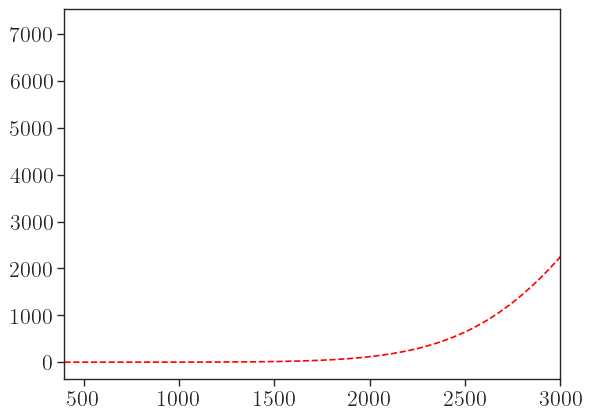

In [168]:
# This cell assumes that 'p', 'bin_centers', 'axarr', 'model', and 'c' 
# have been defined by running the previous cell.

# 1. Calculate the INVERSE function, which is the ideal bias weight
#    This is e^(-P(mtt))
xx = np.arange(400,10000,1)
y_inverse_fit = np.exp(-p(xx) + p(1000) )

    
# 2. Plot the ideal bias weight function
plt.plot(xx, y_inverse_fit, color='red', linestyle='--', 
              label=f'Ideal Bias Weight (e^-P) for {model}')

# After running this, you can refresh your plot display 
# or call plt.show() in a final cell to see the result.
plt.xlim(400, 3000)
#plt.ylim(0, 3000)

plt.show() 

In [12]:
print(6.304100e+01 + 4.043310e+02)
print(4.673080e+02)

467.372
467.308


In [400]:
#Reading files with bias
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/*/qq2ttbar_gs4_ydm2/run_exp/*.npz'))
#files = list(glob.glob('/home/vinicius/EFT_ToyModel/test/Distributions/bias/*/*/*.npz'))
data_exp = []
#Loading the distributions
for f in files:
    aux = np.load(f, allow_pickle = True)
    data_exp.append(aux)
        


data_exp = sorted(data_exp, key=lambda d: d['mass_params'][0])

In [401]:
select1 = []
for d in data_exp:
    if d['mass_params'][0] == 500.0:
        select1.append(d)

print(select1)

[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/UV_BSM/qq2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_475.npz' with keys: mTT, pT1, pT2, deltaPhi, weights...]


[17677 17152 16118 15638 14769 15022 15045 14041 14538 13234 13464 11965
 11593 10605 10667 10748 10118  9007  8294  7338  6994  7040  6170  6491
  6717  5806  5247  5045  4536  4022  4686  4797  4585  4444  4361  4285
  4706  4371  4190  3981  3773  3873  3772  3698  3547  3474  3311  3517
  3408  3312  3115  3135  3156  2904  2932  2904  2829  2758  2589  2380
  2179  2079  1802  1809  1589  1453  1323  1164  1076   949   879   793
   696   654   626   536   514   475   462   356   351   332   310   290
   230   250   223   183   164   162   159] 447962 473111


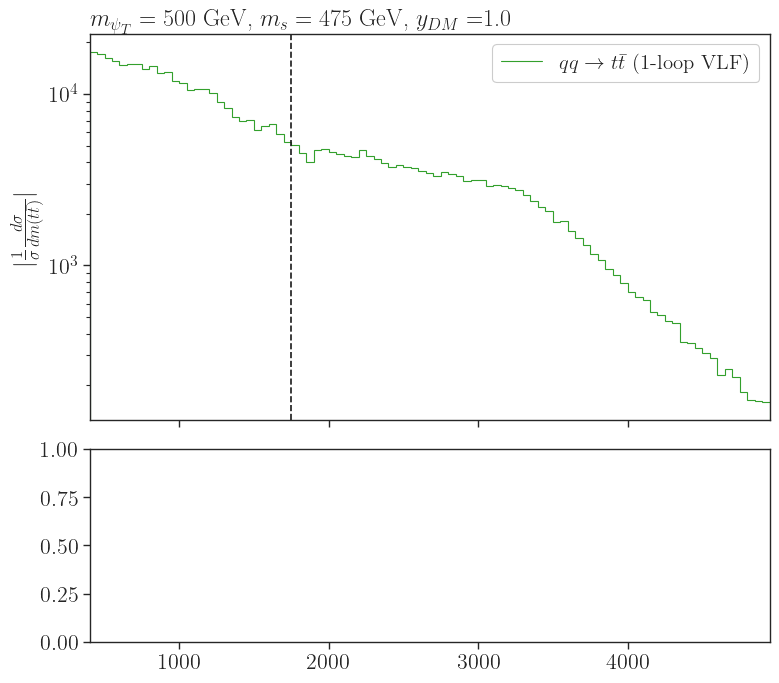

In [402]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select1[0]['mass_params']

#Couping
yDM = select1[0]['ydm']
    

bins = np.arange(400.,5000.,50.)   
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select1):
    if r'$g g \to t \bar{t}$' in d['process']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        axarr[0].stairs(h, edges, color = c[j], label = labels[j] )
        print(h,sum(h), d['nevents'])
                    
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
axarr[0].axvline(x=1750, color='k', linestyle='--')
#axarr[0].set_ylim(1e-8,1e-1)



    
plt.show()

32


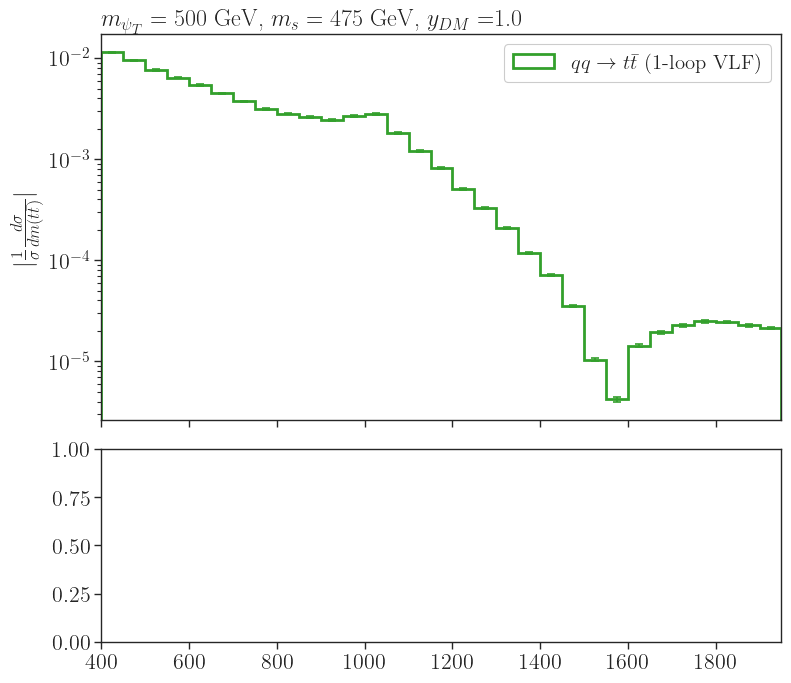

In [403]:

# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select1[0]['mass_params']

#Couping
yDM = select1[0]['ydm']
    

bins = np.arange(400.,2000.,50.)
print(len(bins))
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select1):
    if r'$g g \to t \bar{t}$' in d['process'] and 'EFT' not in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                          color=c[j],alpha=1.0,histtype='step', 
                         linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        #Propagating the error since we are dealing with normalized histograms
        #yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
        yErr = hErr
        axarr[0].errorbar(x,aux[0], yerr = yErr,
                      color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
#axarr[0].set_ylim(1e-8,1e-1)
axarr[0].axvline(x=2250, color='k', linestyle='--')

#Ratio plot
    




    
    
plt.show()

56


IndexError: list index out of range

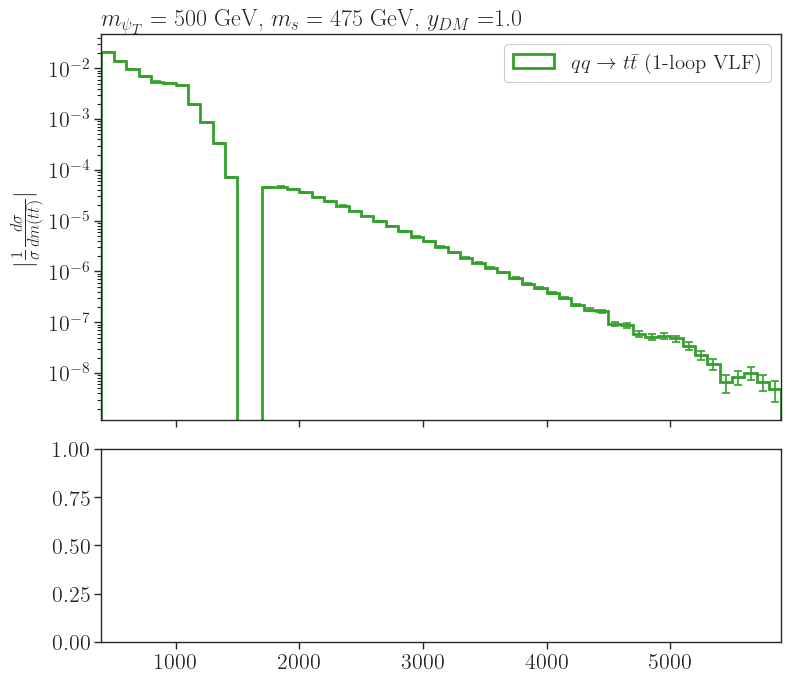

In [328]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select1[0]['mass_params']

#Couping
yDM = select1[0]['ydm']
    

bins = np.arange(400.,6000.,100.)
print(len(bins))
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select1):
    #if r'$q q \to t \bar{t}$' in d['process']:
     #   labels.append('0')
      #  c.append('0')
       # continue
    #else:
    process = d['process']
    model = d['model']
    weights = d['weights']
    pmodels.append(r'%s (%s)' %(process,model))
    label = pmodels[-1]
    labels.append(label)
    c.append(selectColor(model,process))
    h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
    hists.append(h)
    #Compute MC error
    hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
    hErr = np.sqrt(hErr)    
    histsErr.append(hErr)
    #Plotting the BSM hists
    aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                      color=c[j],alpha=1.0,histtype='step', 
                     linewidth=2,fill=False,linestyle='solid')
    
    #Plotting the errors
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #Propagating the error since we are dealing with normalized histograms
    #yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
    yErr = hErr
    axarr[0].errorbar(x,aux[0], yerr = yErr,
                  color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
#axarr[0].set_ylim(1e-8,1e-1)

#Ratio plot
    
# Separating the EFT and the 1-loop UV results
hLoop = hists[1]
hLoop_Err = histsErr[1]
hEFT = hists[0]
hEFT_Err = histsErr[0]

#Computing the ratio EFT/1-loop UV and its error
labels_r = [r'$q q \to t \bar{t}$']
ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
# Remove zero values
nonzero = np.where((np.sign(ratio) != 0))

#Computing the difference (1-Loop - EFT) and its error:
diff = hLoop - hEFT
diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)

#Verifying the type of the subplot
label = labels_r[0]
#Ratio plot
if ratio_plot == True:
    y = ratio
    y_err = ratio_Err
    y_label = r'$N_{EFT}/N_{1-loop}$'
    #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                         #label=label,c=c[j]) 
    #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
    axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                         label=label,c=c[j]) 
    axarr[1].errorbar(x,y, yerr = y_err,
                      color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
    axarr[1].set_ylim(-1.5,1.5)
    
    axarr[1].axhline(y=1, color='k', linestyle='--')
    #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
    axarr[1].axhline(y=-1, color='k', linestyle='--')
    #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
    #axarr[1].set_ylim(2.5,1.5)
    
#Diff over error plot
else:
    y = np.array(diff)/np.array(diff_err)
    y_err = diff_err
    y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
    #Plotting
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                          label=label,c='0')
    axarr[1].scatter(x,y,color='0')
    axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
    axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
    axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

    



#Subplot configs
axarr[1].set_ylabel(y_label)
#axarr[1].set_ylim(-5.5,5.5)
#axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
#axarr[1].set_yscale('log')
axarr[1].grid()
axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
    
plt.show()